# Visualisation et quelques stats sur la dataset

In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import os
import csv

def calculate_text_size(text, font):
    # calculate text size based on font properties
    ascent, descent = font.getmetrics()
    text_width = font.getmask(text).getbbox()[2]
    text_height = ascent + descent
    return text_width, text_height

def get_brightness(color):
    # Calculate brightness of a color (grayscale value) for the text
    r, g, b = ImageColor.getrgb(color)
    return (r * 299 + g * 587 + b * 114) / 1000 


def visualize_image(filename, csv_filename):
        # Open image
        image_path = filename
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)

        # Read bounding box information from CSV file
        if os.path.getsize(csv_filename) > 0:
            with open(csv_filename, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                #next(csvreader)  # Skip header row
                for row in csvreader:
                    if row:
                        xmin, ymin, xmax, ymax = map(int, row[0:4])
                        class_name = row[4]
        
                        # Define colors for different classes
                        class_colors = {
                            'danger': 'yellow',
                            'interdiction': 'purple',
                            'obligation': 'blue',
                            'stop': 'magenta',
                            'ceder': 'cyan',
                            'frouge': 'red',
                            'forange': 'orange',
                            'fvert': 'green'
                        }
        
                         # Define brightness threshold for determining text color
                        brightness_threshold = 150  
        
                        # Get bounding box color
                        box_color = class_colors.get(class_name, 'white') #white is the de
        
                        # Determine text color based on brightness of box color
                        text_color = 'black' if get_brightness(box_color) > brightness_threshold else 'white'
        
                        # Draw bounding box
                        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline=box_color)
        
                        # Define font and size
                        font_size = 30 # Adjust the font size here
                        font = ImageFont.truetype("arial.ttf", font_size)
        
                        # Get text size
                        text_width, text_height = calculate_text_size(class_name, font)
        
                        # Draw filled rectangle as background for class name
                        draw.rectangle([(xmin, ymin - text_height), (xmin + text_width, ymin)], fill=box_color)
        
                        # Draw class name text on top of the filled rectangle
                        draw.text((xmin, ymin - text_height), class_name, fill=text_color, font=font)
        return img

## Visualisation

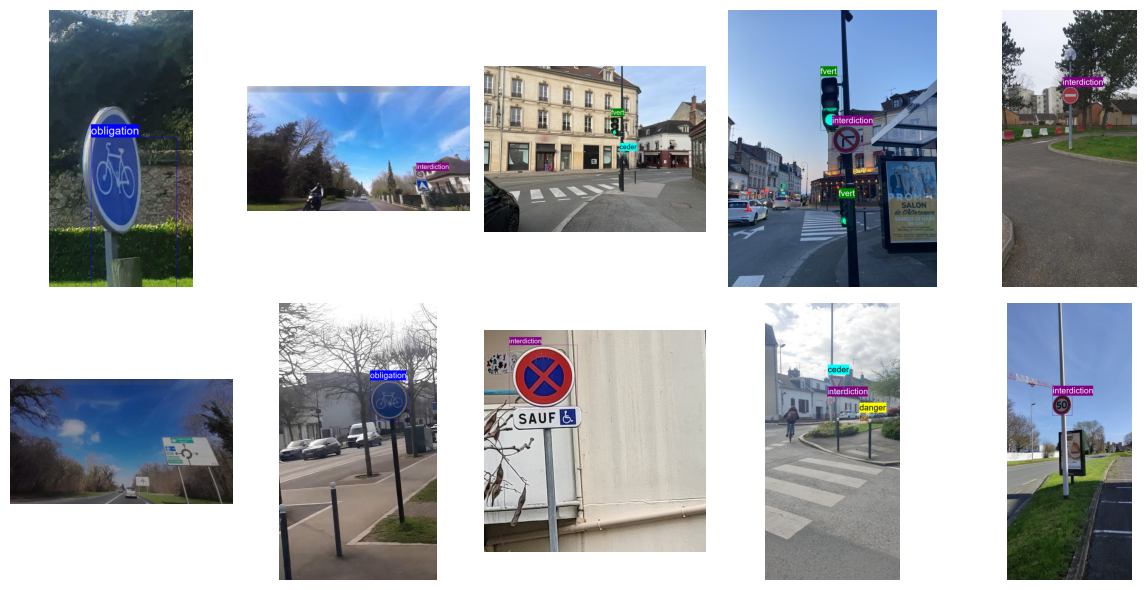

In [2]:
import os
import random
import matplotlib.pyplot as plt


# Affiche au hasard des images positives de l'ensemble d'apprentissage
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for ax in axs.ravel():
    images_dir = os.path.join("train", "images")
    labels_dir = os.path.join("train", "labels")
    image_name = random.choice(os.listdir(images_dir))
    image_path = os.path.join(images_dir, image_name)
    csv_path = os.path.join(labels_dir, image_name[:-4] + ".csv")   
    # Call visualize_image function to modify the image
    image_to_display = visualize_image(image_path, csv_path)
    
    # Display the modified image
    ax.imshow(image_to_display)
    ax.axis('off')
        
plt.tight_layout()
plt.show()


## Stats

In [14]:
import numpy as np

def calculate_class_distribution(folder):
    class_distribution = {}
    total_samples = 0 
    average_light = []
    average_sign = []
    average_w = []
    average_h = []

    images_folder = os.path.join(folder, 'images')
    annotation_folder = os.path.join(folder, 'labels')
    
    for filename in os.listdir(annotation_folder):
        csv_filename = os.path.join(annotation_folder,filename)
        if os.path.getsize(csv_filename) > 0:
            with open(csv_filename, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                #next(csvreader)  # Skip header row
                for row in csvreader:
                    if row:
                        xmin, ymin, xmax, ymax = map(int, row[0:4])
                        w = xmax - xmin
                        h = ymax - ymin
                        average_w.append(w)
                        average_h.append(h)

                        class_label = str(row[4])  # Extract class label from the row
                        if class_label in ["fvert", "frouge", "forange"]:
                            average_light.append(w/h)
                        else:
                            average_sign.append(w/h)
                        class_distribution[class_label] = class_distribution.get(class_label, 0) + 1
                        total_samples += 1

    # Calculate percentage distribution
    class_distribution_percent = {label: count / total_samples for label, count in class_distribution.items()}
    average_sign = (np.mean(average_sign))
    average_light = (np.mean(average_light))
    average_size = (np.mean(average_w), np.mean(average_h))


    return class_distribution_percent, total_samples, average_sign, average_light, average_size

In [15]:
original_folder = "train"
original_class_distribution, original_total_samples, average_sign, average_light, average_size =  calculate_class_distribution(original_folder)
print("Original Class distribution:", original_class_distribution)
print("Original Total samples:", original_total_samples)
print("Average ratio of the sign: ", average_sign)
print("Average ratio of the lights: ", average_light)
print("Average size of the labels: ", average_size)

Original Class distribution: {'frouge': 0.07936507936507936, 'ceder': 0.11728395061728394, 'interdiction': 0.3218694885361552, 'fvert': 0.09611992945326278, 'stop': 0.08818342151675485, 'obligation': 0.09523809523809523, 'danger': 0.14285714285714285, 'forange': 0.059082892416225746}
Original Total samples: 1134
Average ratio of the sign:  1.0087086916299572
Average ratio of the lights:  0.43405293812251217
Average size of the labels:  (118.47089947089947, 136.50617283950618)
